<a href="https://colab.research.google.com/github/BroBay24/Analisis-Sentimen-E-Commerce-indonesia/blob/main/Sentimen_Analysis_using_KNN%2C_Multinomial_NBayes%2C_StochasticGradDest_DT_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# **Mengimport Dataset**

In [ ]:
data = pd.read_csv("dataset_ready_modif.csv", sep=';', encoding='latin1')
data.head(10)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"Sekarang mau order malah sulit, gimana sihha p...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget. Gabisa login padahal...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,KECEWAAAAA.....sudah 2 x 24 jam lebih... statu...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"pakait sudah 5 hari statusnya masih di gudang,...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,Apaan sih gratis ongkirnya gak bisa di pakai.....,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
5,Tolong metode pembatalannya di percepat yc,NEGATIF,BUKALAPAK,06/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
6,Daftar akun aja sulitnya minta ampun,NEGATIF,BUKALAPAK,07/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
7,Aplikasi nya kurang jossss Pas verifikasi nom...,NEGATIF,BUKALAPAK,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
8,"Kenapa berat banget aplikasinya, kurang respon...",NEGATIF,BUKALAPAK,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
9,Aku gak ngerti kok uinstal terus sih,NEGATIF,BUKALAPAK,19/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


DATA TIAP E-COMMERCE:
SOURCE
SHOPEE       400
BUKALAPAK    348
TOKOPEDIA    295
LAZADA       289
Name: count, dtype: int64


DATA E-COMMERCE TIAP SENTIMEN:
                    Review  DATE_REVIEW  MONTH  YEAR  TRIMESTER  CONCAT
SOURCE    SENTIMEN                                                     
BUKALAPAK NEGATIF      183          183    183   183        183     183
          POSITIF      165          165    165   165        165     165
LAZADA    NEGATIF      184          184    184   184        184     184
          POSITIF      105          105    105   105        105     105
SHOPEE    NEGATIF      201          201    201   201        201     201
          POSITIF      199          199    199   199        199     199
TOKOPEDIA NEGATIF      207          207    207   207        207     207
          POSITIF       88           88     88    88         88      88


VISUALISASI DATA:


Text(0.5, 1.0, '\nDataset E-Commerce 2020-2022')

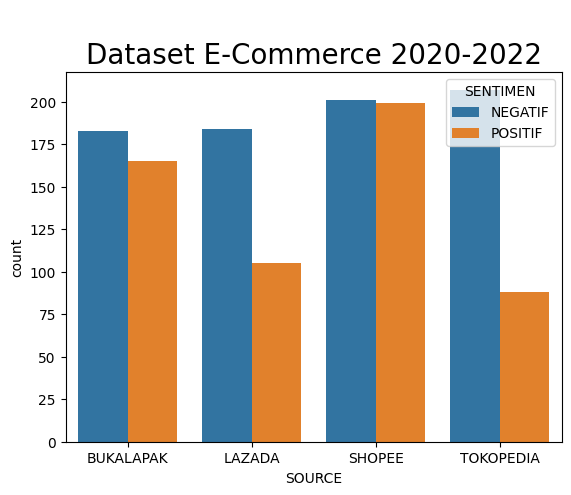

In [ ]:
print('DATA TIAP E-COMMERCE:')
print(data['SOURCE'].value_counts())
print('')
print('')
print('DATA E-COMMERCE TIAP SENTIMEN:')
print(data.groupby(['SOURCE','SENTIMEN']).count())
print('')
print('')
print('VISUALISASI DATA:')
sns.countplot(x ='SOURCE', data = data, hue = 'SENTIMEN')
plt.title("\nDataset E-Commerce 2020-2022", fontsize='20')

# **EDA**

## GRAFIK TREND SENTIMEN 2020-2022 TIAP E-COMMERCE

### FILTER DATA SHOPEE

In [ ]:
#SHOPEE
data_shopee_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_shopee_negatif_filter2 = data_shopee_negatif_filter1[data['SOURCE'].str.contains('SHOPEE')]
data_shopee_negatif_filter2.head()

/tmp/ipython-input-1553704634.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_shopee_negatif_filter2 = data_shopee_negatif_filter1[data['SOURCE'].str.contains('SHOPEE')]


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
637,SHOPEE ARISAN SAYA TIDAK BISA DIBUKA. STUCK DI...,NEGATIF,SHOPEE,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
640,Semakin ke sini shopee semakin membagongkan. J...,NEGATIF,SHOPEE,16/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
641,Tolong ya min Top uo shopeepay tuh gk mesti pk...,NEGATIF,SHOPEE,17/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
646,Shoping kadang²gk bener aku pesen tapi gk di a...,NEGATIF,SHOPEE,07/02/2020,February,2020,TRIMESTER1,2020-TRIMESTER1
648,kenapa susah bngt msuk ke shopee,NEGATIF,SHOPEE,12/02/2020,February,2020,TRIMESTER1,2020-TRIMESTER1


### FILTER DATA TOKOPEDIA

In [ ]:
#TOKOPEDIA
data_tokopedia_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_tokopedia_negatif_filter2 = data_tokopedia_negatif_filter1[data['SOURCE'].str.contains('TOKOPEDIA')]
data_tokopedia_negatif_filter2.head()

/tmp/ipython-input-1606848540.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_tokopedia_negatif_filter2 = data_tokopedia_negatif_filter1[data['SOURCE'].str.contains('TOKOPEDIA')]


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
1037,gila jadi deg2an gak sih? tp ini kaya gimana y...,NEGATIF,TOKOPEDIA,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1039,astagfirullah,NEGATIF,TOKOPEDIA,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1040,Saya udh kecewa banget... Uang saya belum kemb...,NEGATIF,TOKOPEDIA,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1041,KECEWA DENGAN PERUBAHAN EKSPEDISI PENGIRIMANNY...,NEGATIF,TOKOPEDIA,16/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1042,"No system is safe\n\nQuote film ""who am I""\n\n...",NEGATIF,TOKOPEDIA,23/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


### FILTER DATA BUKALAPAK

In [ ]:
#BUKALAPAK
data_bukalapak_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_bukalapak_negatif_filter2 = data_bukalapak_negatif_filter1[data['SOURCE'].str.contains('BUKALAPAK')]
data_bukalapak_negatif_filter2.head()

/tmp/ipython-input-662058987.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_bukalapak_negatif_filter2 = data_bukalapak_negatif_filter1[data['SOURCE'].str.contains('BUKALAPAK')]


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"Sekarang mau order malah sulit, gimana sihha p...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget. Gabisa login padahal...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,KECEWAAAAA.....sudah 2 x 24 jam lebih... statu...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"pakait sudah 5 hari statusnya masih di gudang,...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,Apaan sih gratis ongkirnya gak bisa di pakai.....,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


### FILTER DATA LAZADA

In [ ]:
#LAZADA
data_lazada_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_lazada_negatif_filter2 = data_lazada_negatif_filter1[data['SOURCE'].str.contains('LAZADA')]
data_lazada_negatif_filter2.head()

/tmp/ipython-input-319017600.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_lazada_negatif_filter2 = data_lazada_negatif_filter1[data['SOURCE'].str.contains('LAZADA')]


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
348,baru 10 bulan layarnya dah bergaris,NEGATIF,LAZADA,31/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
349,Flashdisk nya cepat rusak cuman bisa nyimpan b...,NEGATIF,LAZADA,21/04/2020,April,2020,TRIMESTER1,2020-TRIMESTER1
350,Jelek,NEGATIF,LAZADA,23/02/2020,February,2020,TRIMESTER1,2020-TRIMESTER1
351,flash disk ga berfungsi cuy.,NEGATIF,LAZADA,05/03/2020,March,2020,TRIMESTER1,2020-TRIMESTER1
352,kecewa . barang saya terima dalam kondisi peca...,NEGATIF,LAZADA,09/04/2020,April,2020,TRIMESTER1,2020-TRIMESTER1


### GROUPING SHOPEE

In [ ]:
#SHOPEE
data_trend_negatif_shopee = data_shopee_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_shopee.sort_index(axis=0)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER
CONCAT,,,,,,,
2020-TRIMESTER1,25,25,25,25,25,25,25
2020-TRIMESTER2,20,20,20,20,20,20,20
2020-TRIMESTER3,22,22,22,22,22,22,22
2021-TRIMESTER1,22,22,22,22,22,22,22
2021-TRIMESTER2,23,23,23,23,23,23,23
2021-TRIMESTER3,18,18,18,18,18,18,18
2022-TRIMESTER1,20,20,20,20,20,20,20
2022-TRIMESTER2,27,27,27,27,27,27,27
2022-TRIMESTER3,24,24,24,24,24,24,24


### GROUPING TOKOPEDIA

In [ ]:
#TOKOPEDIA
data_trend_negatif_tokopedia = data_tokopedia_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_tokopedia.sort_index(axis=0)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER
CONCAT,,,,,,,
2020-TRIMESTER1,14,14,14,14,14,14,14
2020-TRIMESTER2,16,16,16,16,16,16,16
2020-TRIMESTER3,15,15,15,15,15,15,15
2021-TRIMESTER1,18,18,18,18,18,18,18
2021-TRIMESTER2,23,23,23,23,23,23,23
2021-TRIMESTER3,21,21,21,21,21,21,21
2022-TRIMESTER1,30,30,30,30,30,30,30
2022-TRIMESTER2,33,33,33,33,33,33,33
2022-TRIMESTER3,37,37,37,37,37,37,37


### GROUPING BUKALAPAK

In [ ]:
#BUKALAPAK
data_trend_negatif_bukalapak = data_bukalapak_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_bukalapak.sort_index(axis=0)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER
CONCAT,,,,,,,
2020-TRIMESTER1,30,30,30,30,30,30,30
2020-TRIMESTER2,27,27,27,27,27,27,27
2020-TRIMESTER3,29,29,29,29,29,29,29
2021-TRIMESTER1,21,21,21,21,21,21,21
2021-TRIMESTER2,19,19,19,19,19,19,19
2021-TRIMESTER3,12,12,12,12,12,12,12
2022-TRIMESTER1,18,18,18,18,18,18,18
2022-TRIMESTER2,16,16,16,16,16,16,16
2022-TRIMESTER3,11,11,11,11,11,11,11


### GROUPING LAZADA

In [ ]:
#LAZADA
data_trend_negatif_lazada = data_lazada_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_lazada.sort_index(axis=0)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER
CONCAT,,,,,,,
2020-TRIMESTER1,30,30,30,30,30,30,30
2020-TRIMESTER2,27,27,27,27,27,27,27
2020-TRIMESTER3,24,24,24,24,24,24,24
2021-TRIMESTER1,26,26,26,26,26,26,26
2021-TRIMESTER2,19,19,19,19,19,19,19
2021-TRIMESTER3,18,18,18,18,18,18,18
2022-TRIMESTER1,15,15,15,15,15,15,15
2022-TRIMESTER2,14,14,14,14,14,14,14
2022-TRIMESTER3,11,11,11,11,11,11,11


### VISUALISASI TREND

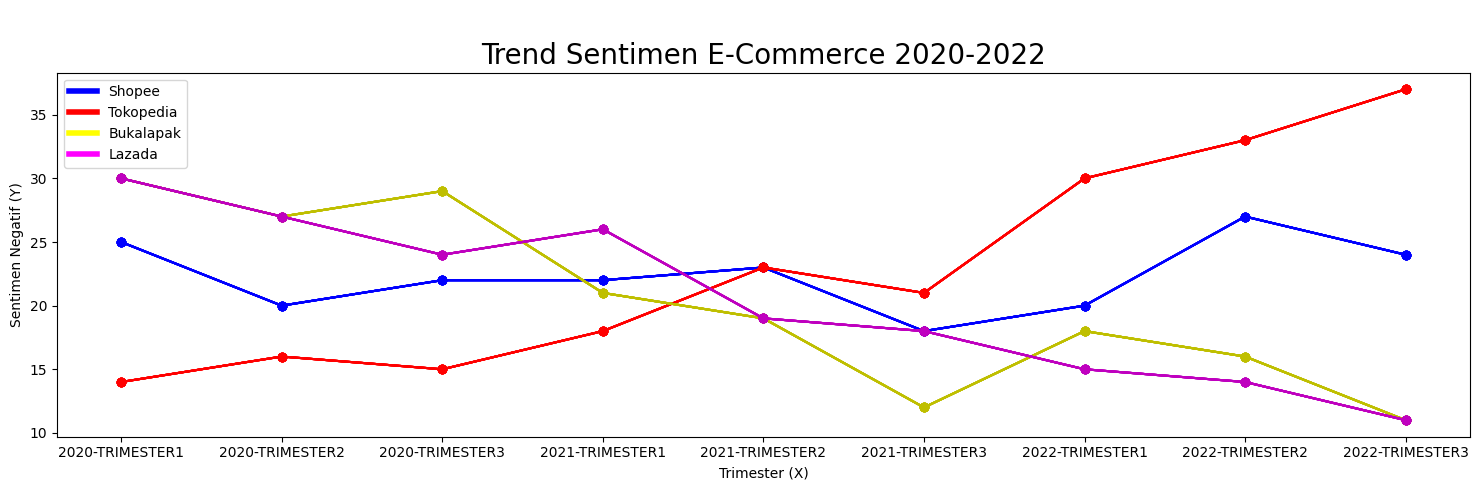

In [ ]:
plt.rcParams["figure.figsize"] = [15.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.plot(data_trend_negatif_shopee, 'b-o')
plt.plot(data_trend_negatif_tokopedia, 'r-o')
plt.plot(data_trend_negatif_bukalapak, 'y-o')
plt.plot(data_trend_negatif_lazada, 'm-o', label='Lazada')
plt.xlabel('Trimester (X)')
plt.ylabel('Sentimen Negatif (Y)')
colors = ['blue', 'red', 'yellow', 'magenta']
lines = [Line2D([0], [0], color=c, linewidth=4, linestyle='-') for c in colors]
labels = ['Shopee', 'Tokopedia', 'Bukalapak', 'Lazada']
plt.legend(lines, labels)
plt.title("\nTrend Sentimen E-Commerce 2020-2022", fontsize='20')
plt.show()

Apabila diperhatikan berdasarkan grafik trend diatas, maka sentimen negatif Tokopedia meningkat dari 2020 Trimester 1 hingga 2022 Trimester 3, kemungkinan sentimen ini dipengaruhi faktor isu kebocoran data pada tahun 2020
Sedangkan sentimen negatif Shopee bisa dikatakan stagnan, fluktuatif namun tidak signifikan,
Sentimen negatif Bukalapak dan Lazada mengalami penurunan sepanjang tahun 2020 Trimester 1 - 2022 Trimester 3, bisa disimpulkan ke 2 e-commerce tsb mengalami peningkatan secara signifikan tingkat kepercayaan pengguna terhadap 2 platform tsb

## Preprocessing Dataset
Tahapan yang dilakukan:
1. **Case folding**: Merubah huruf besar menjadi huruf kecil
2. **Tokenizing**: Memecah teks menjadi per kata dalam sebuah list
3. **Normalization**: Menormalisasikan teks agar sesuai EYD
4. **Stopwords**: Menghilangkan kata tidak penting spt: “yang”, “dan”, “di”, “ke”, “the”, “is”, dll.
5. **Stemming**: Merubah kata ke dalam bentuk dasarnya

In [ ]:
# Case Folding
def casefolding(Review):
    Review = Review.lower()
    return Review
data['Review'] = data['Review'].apply(casefolding)
data.head(10)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"sekarang mau order malah sulit, gimana sihha p...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget. gabisa login padahal...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaa.....sudah 2 x 24 jam lebih... statu...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"pakait sudah 5 hari statusnya masih di gudang,...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,apaan sih gratis ongkirnya gak bisa di pakai.....,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
5,tolong metode pembatalannya di percepat yc,NEGATIF,BUKALAPAK,06/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
6,daftar akun aja sulitnya minta ampun,NEGATIF,BUKALAPAK,07/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
7,aplikasi nya kurang jossss pas verifikasi nom...,NEGATIF,BUKALAPAK,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
8,"kenapa berat banget aplikasinya, kurang respon...",NEGATIF,BUKALAPAK,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
9,aku gak ngerti kok uinstal terus sih,NEGATIF,BUKALAPAK,19/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
# Tokenizing manual dengan regex
import re
import string
def cleansing(Review):
    Review = Review.strip(" ")
    Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
    Review = re.sub(r'\d+', '', Review)
    Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
    Review = re.sub('\s+',' ', Review)
    return Review
data['Review'] = data['Review'].apply(cleansing)
# data.head(10)
data


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1434651917.py:9: SyntaxWarning: invalid escape sequence '\s'
  Review = re.sub('\s+',' ', Review)


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,sekarang mau order malah sulit gimana sihha pa...,NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget gabisa login padahal ...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaasudah jam lebih status belum berubah...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,pakait sudah hari statusnya masih di gudang ka...,NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,apaan sih gratis ongkirnya gak bisa di pakai t...,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
...,...,...,...,...,...,...,...,...
1327,pesan warna merah dikirim warna biru sangat me...,NEGATIF,TOKOPEDIA,18/11/2022,November,2022,TRIMESTER3,2022-TRIMESTER3
1328,hp ringkih gmpg rusak antara hp nokia atau rep...,NEGATIF,TOKOPEDIA,21/11/2022,November,2022,TRIMESTER3,2022-TRIMESTER3
1329,koj batre nya boros banget yak ama sinyal gak ...,NEGATIF,TOKOPEDIA,30/09/2022,September,2022,TRIMESTER3,2022-TRIMESTER3
1330,hp nya gampang mati sendiri &amp; saya tanya t...,NEGATIF,TOKOPEDIA,21/09/2022,September,2022,TRIMESTER3,2022-TRIMESTER3


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenizing dengan library nltk
import nltk
nltk.download('punkt_tab') # Download the missing resource
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Review'] = data['Review'].apply(word_tokenize_wrapper)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"[sekarang, mau, order, malah, sulit, gimana, s...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,"[aplikasinya, lemot, banget, gabisa, login, pa...",NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,"[kecewaaaaasudah, jam, lebih, status, belum, b...",NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"[pakait, sudah, hari, statusnya, masih, di, gu...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,"[apaan, sih, gratis, ongkirnya, gak, bisa, di,...",NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
# Normalization
normalizad_word = pd.read_csv("normalisasi.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Review'] = data['Review'].apply(normalized_term)

data['Review'].head(20)

/tmp/ipython-input-2782749598.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
/tmp/ipython-input-2782749598.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,Review
0,"[sekarang, mau, order, malah, sulit, bagaimana..."
1,"[aplikasinya, lemot, banget, gabisa, login, pa..."
2,"[kecewaaaaasudah, jam, lebih, status, belum, b..."
3,"[pakait, sudah, hari, statusnya, masih, di, gu..."
4,"[apaan, sih, gratis, ongkirnya, tidak, bisa, d..."
5,"[tolong, metode, pembatalannya, di, percepat, yc]"
6,"[daftar, akun, saja, sulitnya, minta, ampun]"
7,"[aplikasi, nya, kurang, jossss, pas, verifikas..."
8,"[kenapa, berat, banget, aplikasinya, kurang, r..."
9,"[saya, tidak, ngerti, kok, uinstal, terus, sih]"


In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("stopwords.csv")
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
data['Review'] = data['Review'].apply(stopword_removal)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"[order, sulit, sihha, persyaratan, ngak]",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,"[aplikasinya, lemot, banget, gabisa, login, co...",NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,"[kecewaaaaasudah, jam, status, berubah, kemasp...",NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"[pakait, statusnya, gudang, kagak, gerak]",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,"[sih, gratis, ongkirnya, pakai, tipu-tipu, pas...",NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
5,"[tolong, metode, pembatalannya, percepat, yc]",NEGATIF,BUKALAPAK,06/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
6,"[daftar, akun, sulitnya, ampun]",NEGATIF,BUKALAPAK,07/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
7,"[aplikasi, nya, jossss, pas, verifikasi, nomer...",NEGATIF,BUKALAPAK,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
8,"[berat, banget, aplikasinya, responsif, memili...",NEGATIF,BUKALAPAK,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
9,"[ngerti, uinstal, sih]",NEGATIF,BUKALAPAK,19/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
# Stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Review:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Review'] = data['Review'].apply(stemming)

data.to_csv('cleandataset.csv', index=False)
data_clean = pd.read_csv('cleandataset.csv', encoding='latin1')
data_clean.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.8 MB/s eta 0:00:00
order sulit sihha syarat ngak
aplikasi lot banget gabisa login coba pakai line pakai password loading pakai nomer telepon kode gamasuk mau sih tambah kali ngasih ulas tulis halaman baik capek tulis ulas masak ulang
kecewaaaaasudah jam status ubah kemaspadahal info jual barang kirim
pakait status gudang kagak gerak
sih gratis ongkirnya pakai tipu pas check out gagal gagal hadeh niat ngasih gratis ongkir yowes usa
tolong metode batal cepat yc
daftar akun sulit ampun
aplikasi nya jossss pas verifikasi nomer hp muncul kode emosi
berat banget aplikasi responsif pilih item
ngerti uinstal sih
buruk masalah mulu
males masuk server eror alih deh lazada
tolong kembali pilih jasa kirim
pas chekout gagal
update fitur fontnya tetep ubah
bintang bicara verikasi nomer telepon bisarugi data
belanja bayar kah nya sekolah pandai tranper uang
cs kait pokok jelek banget cs nya
klaim gratis ongkir tolong baik usaha macet
payah 

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,order sulit sihha syarat ngak,NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasi lot banget gabisa login coba pakai li...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaasudah jam status ubah kemaspadahal i...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,pakait status gudang kagak gerak,NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,sih gratis ongkirnya pakai tipu pas check out ...,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [ ]:
data_clean = pd.read_csv('cleandataset.csv', encoding='latin1')
data_clean.head()

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,order sulit sihha syarat ngak,NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasi lot banget gabisa login coba pakai li...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaasudah jam status ubah kemaspadahal i...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,pakait status gudang kagak gerak,NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,sih gratis ongkirnya pakai tipu pas check out ...,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Review' : 'string'})
data_clean.dtypes

,0
Review,string[python]
SENTIMEN,category
SOURCE,object
DATE_REVIEW,object
MONTH,object
YEAR,int64
TRIMESTER,object
CONCAT,object


## **Feature Engineering dengan TF-IDF**
Ekstraksi fitur Text: Word Counting

In [ ]:
# TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Review'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Review'].astype('U'))
print(text_tf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11045 stored elements and shape (1332, 3023)>
  Coords	Values
  (0, 1977)	0.37395045289916
  (0, 2663)	0.4150659428444779
  (0, 2535)	0.49827224469997766
  (0, 2680)	0.49827224469997766
  (0, 1793)	0.4374138340181172
  (1, 118)	0.08990277446076607
  (1, 1523)	0.1488313617204123
  (1, 198)	0.09794206073388553
  (1, 829)	0.16904278624835006
  (1, 1510)	0.16417166923460738
  (1, 487)	0.15310616097988403
  (1, 2011)	0.30977508232693857
  (1, 1494)	0.21875140279006153
  (1, 2044)	0.17832855373418605
  (1, 1504)	0.17182192834094737
  (1, 1874)	0.17489412739212504
  (1, 2724)	0.18222218518769748
  (1, 1327)	0.16417166923460738
  (1, 835)	0.20692847735506215
  (1, 1614)	0.21875140279006153
  (1, 2532)	0.12997641069682264
  (1, 2690)	0.18222218518769748
  (1, 1171)	0.13883146249402734
  (1, 1802)	0.18222218518769748
  (1, 2890)	0.36444437037539495
  :	:
  (1329, 1330)	0.40471499687969414
  (1329, 241)	0.40471499687969414
  (1329, 373

## Splitting dataset untuk Training dan Testing

In [ ]:
# Splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['SENTIMEN'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (400, 3023)
Jumlah Data Latih: (932, 3023)
Jumlah data uji dengan sentimen positif: 172
Jumlah data uji dengan sentimen negatif: 228
Jumlah data latih dengan sentimen positif: 385
Jumlah data latih dengan sentimen negatif: 547


,count
SENTIMEN,
NEGATIF,775
POSITIF,557


### Perform algoritma KNN, MNaiveBayes, SGradientDescent, DTree

In [ ]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveKnn = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[175  53]
 [ 21 151]]

TN: 175
FP: 53
FN: 21
TP: 151
              precision    recall  f1-score   support

     NEGATIF       0.89      0.77      0.83       228
     POSITIF       0.74      0.88      0.80       172

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.83      0.81      0.82       400


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.815
Precision: 0.7401960784313726
Recall: 0.877906976744186
f1_score: 0.8031914893617021
error_rate: 0.18500000000000005


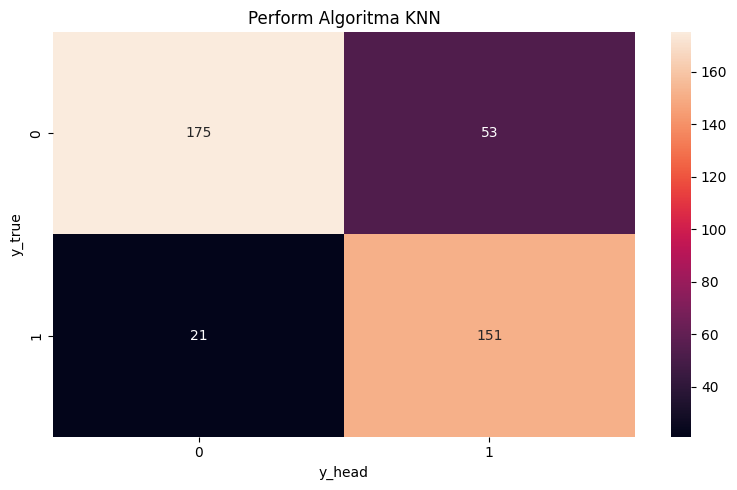

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma KNN")
plt.show()

In [ ]:
# perform algoritma MNaiveBayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveMNB = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[216  12]
 [ 34 138]]

TN: 216
FP: 12
FN: 34
TP: 138
              precision    recall  f1-score   support

     NEGATIF       0.86      0.95      0.90       228
     POSITIF       0.92      0.80      0.86       172

    accuracy                           0.89       400
   macro avg       0.89      0.87      0.88       400
weighted avg       0.89      0.89      0.88       400


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.885
Precision: 0.92
Recall: 0.8023255813953488
f1_score: 0.8571428571428571
error_rate: 0.11499999999999999


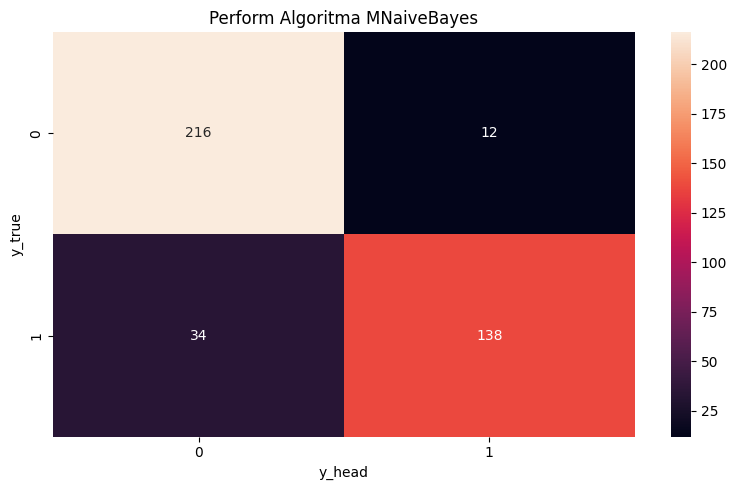

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma MNaiveBayes")
plt.show()

In [ ]:
# perform algoritma SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveSGD = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[203  25]
 [ 27 145]]

TN: 203
FP: 25
FN: 27
TP: 145
              precision    recall  f1-score   support

     NEGATIF       0.88      0.89      0.89       228
     POSITIF       0.85      0.84      0.85       172

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.87
Precision: 0.8529411764705882
Recall: 0.8430232558139535
f1_score: 0.847953216374269
error_rate: 0.13


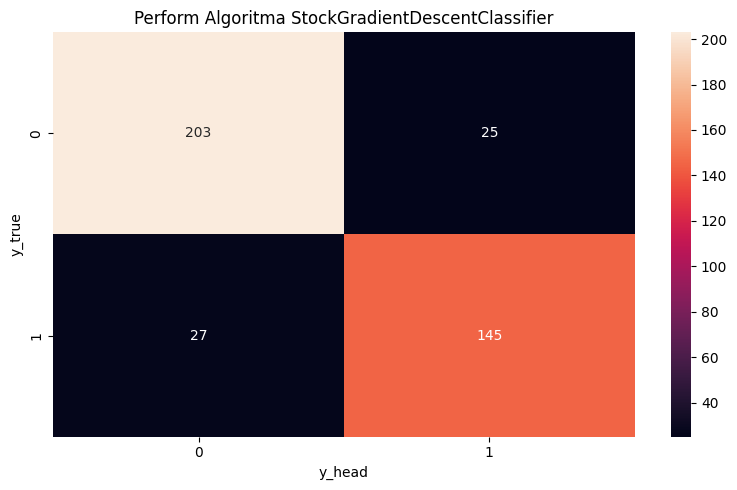

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma StockGradientDescentClassifier")
plt.show()

In [ ]:
# perform algoritma Decision Tree
from nltk.corpus.reader.timit import Tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveDT = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[184  44]
 [ 47 125]]

TN: 184
FP: 44
FN: 47
TP: 125
              precision    recall  f1-score   support

     NEGATIF       0.80      0.81      0.80       228
     POSITIF       0.74      0.73      0.73       172

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.7725
Precision: 0.7396449704142012
Recall: 0.7267441860465116
f1_score: 0.7331378299120235
error_rate: 0.22750000000000004


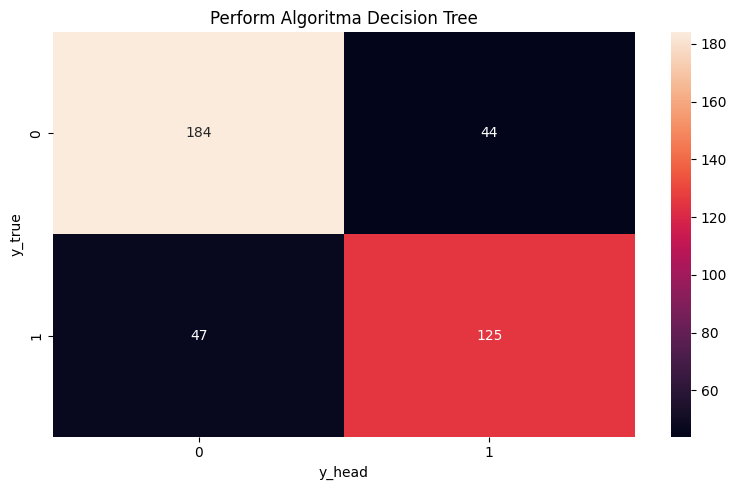

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma Decision Tree")
plt.show()

# ***Resume Pengujian***

In [ ]:
listAccuracy = []
listAccuracy.append(saveKnn)
listAccuracy.append(saveMNB)
listAccuracy.append(saveSGD)
listAccuracy.append(saveDT)
print(saveKnn)
print(saveMNB)
print(saveSGD)
print(saveDT)
print(listAccuracy)

0.815
0.885
0.87
0.772
[0.815, 0.885, 0.87, 0.772]


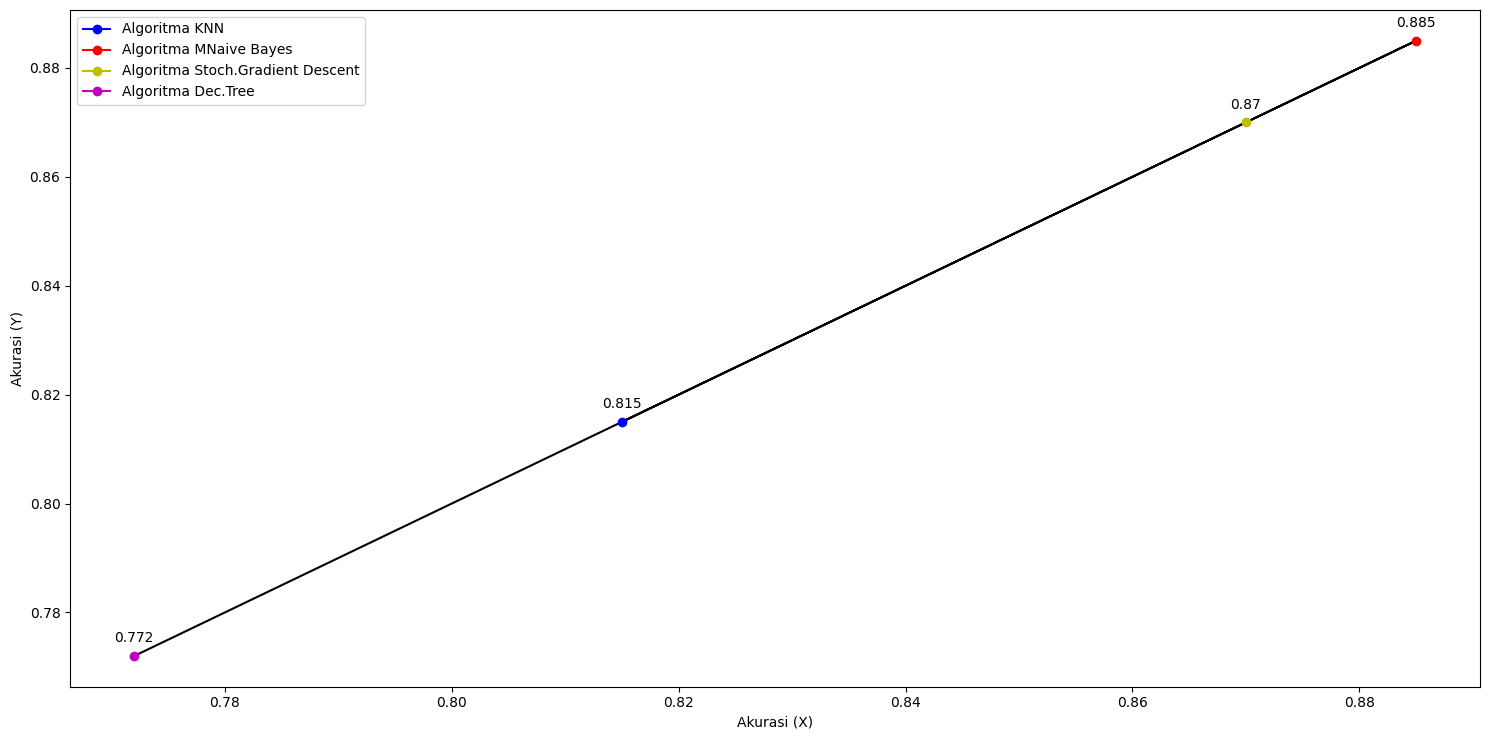

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(listAccuracy, listAccuracy, 'k')
plt.plot(saveKnn, saveKnn, 'b-o', label='Algoritma KNN')
plt.plot(saveMNB, saveMNB, 'r-o', label='Algoritma MNaive Bayes')
plt.plot(saveSGD, saveSGD, 'y-o', label='Algoritma Stoch.Gradient Descent')
plt.plot(saveDT, saveDT, 'm-o', label='Algoritma Dec.Tree')
plt.xlabel('Akurasi (X)')
plt.ylabel('Akurasi (Y)')
plt.annotate(text=str(saveKnn),
                 xy = (saveKnn,saveKnn),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveMNB),
                 xy = (saveMNB,saveMNB),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveSGD),
                 xy = (saveSGD,saveSGD),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveDT),
                 xy = (saveDT,saveDT),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.legend()
plt.show()

# Task
Apply SMOTE (Synthetic Minority Over-sampling Technique) to the `X_train` and `y_train` datasets to handle class imbalance, ensuring it is performed after the TF-IDF transformation.

## Handle Class Imbalance

### Subtask:
Apply SMOTE (Synthetic Minority Over-sampling Technique) to the `X_train` and `y_train` datasets to address class imbalance.


**Reasoning**:
The subtask requires applying SMOTE to address class imbalance. The first step is to install the `imblearn` library if it's not already installed.



In [ ]:
pip install imblearn

**Reasoning**:
The `imblearn` library has been installed. Now, I need to import the `SMOTE` class, create an instance, and apply it to the training data (`X_train` and `y_train`) to resample it, as specified in the instructions.



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.shape)
print("Resampled training set shape:", X_train_smote.shape, y_train_smote.shape)
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Original training set shape: (932, 3023) (932,)
Resampled training set shape: (1094, 3023) (1094,)
Class distribution after SMOTE:
SENTIMEN
NEGATIF    547
POSITIF    547
Name: count, dtype: int64


## Implement Support Vector Machine (SVM) Classifier

### Subtask:
Add an SVM classifier to the pipeline and evaluate its performance using accuracy, precision, recall, and F1-score, including a confusion matrix.


**Reasoning**:
I need to implement an SVM classifier as per the instructions. This involves importing `SVC`, instantiating the classifier, training it on the SMOTE-resampled data, making predictions on the test data, and then evaluating its performance using various metrics and a confusion matrix heatmap.



confusion matrix:
 [[217  11]
 [ 45 127]]

TN: 217
FP: 11
FN: 45
TP: 127
              precision    recall  f1-score   support

     NEGATIF       0.83      0.95      0.89       228
     POSITIF       0.92      0.74      0.82       172

    accuracy                           0.86       400
   macro avg       0.87      0.85      0.85       400
weighted avg       0.87      0.86      0.86       400


Hasil Klasifikasi Sentimen Analisis Shopee (SVM):
Accuracy: 0.86
Precision: 0.9202898550724637
Recall: 0.7383720930232558
f1_score: 0.8193548387096774
error_rate: 0.14


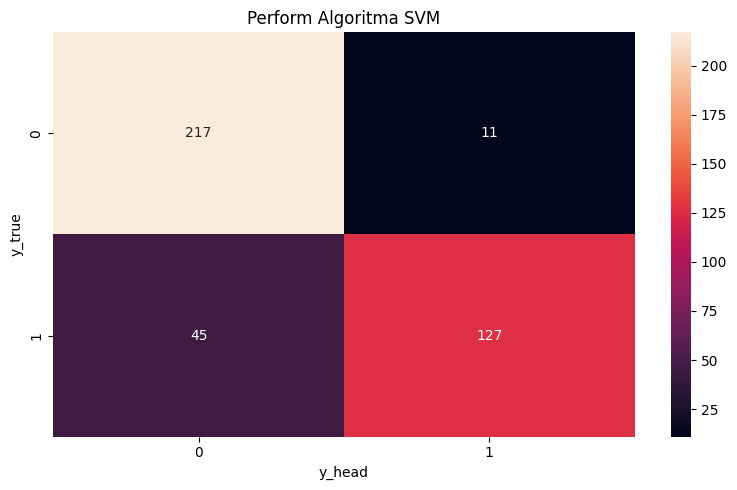

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate SVM classifier
clf_svm = SVC(random_state=33)

# Train the SVM classifier using SMOTE-resampled training data
clf_svm.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
predicted_svm = clf_svm.predict(X_test)

# Print confusion matrix
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted_svm)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted_svm).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted_svm, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee (SVM):")
print("Accuracy:" , accuracy_score(y_test, predicted_svm))
print("Precision:" , precision_score(y_test, predicted_svm, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test, predicted_svm, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test, predicted_svm, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test, predicted_svm))

saveSVM = round(accuracy_score(y_test, predicted_svm),3)

# Create heatmap visualization of the confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted_svm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma SVM")
plt.show()

**Reasoning**:
I need to add the accuracy of the SVM model (`saveSVM`) to the `listAccuracy` list so that it can be included in the summary of all model accuracies and subsequently visualized.



In [ ]:
listAccuracy.append(saveSVM)
print(listAccuracy)

[0.815, 0.885, 0.87, 0.772, 0.86]


**Reasoning**:
Now that the SVM model's accuracy has been added to `listAccuracy`, I need to update the visualization that compares the accuracies of all implemented algorithms. This requires re-plotting the graph to include the SVM model's performance.



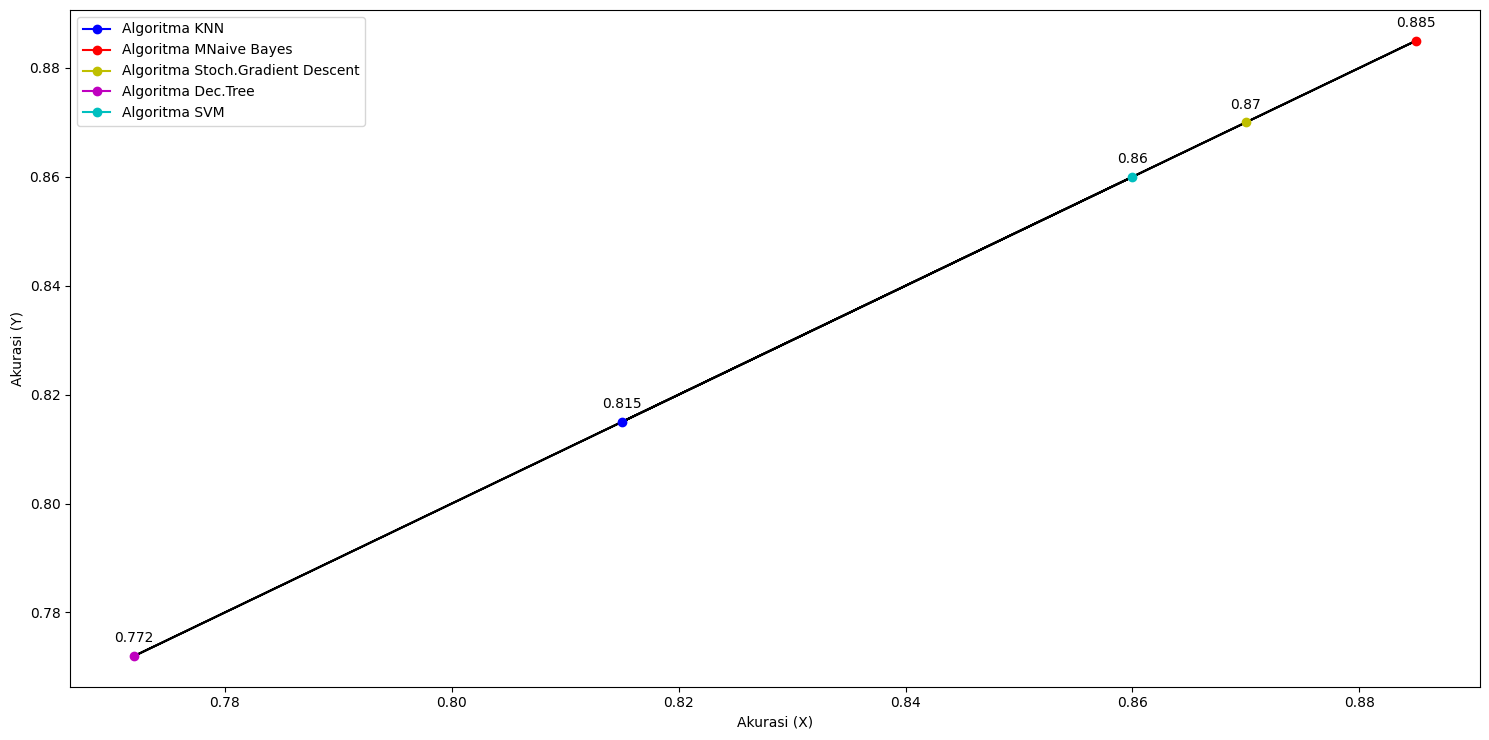

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(listAccuracy, listAccuracy, 'k')
plt.plot(saveKnn, saveKnn, 'b-o', label='Algoritma KNN')
plt.plot(saveMNB, saveMNB, 'r-o', label='Algoritma MNaive Bayes')
plt.plot(saveSGD, saveSGD, 'y-o', label='Algoritma Stoch.Gradient Descent')
plt.plot(saveDT, saveDT, 'm-o', label='Algoritma Dec.Tree')
plt.plot(saveSVM, saveSVM, 'c-o', label='Algoritma SVM') # Added SVM plot
plt.xlabel('Akurasi (X)')
plt.ylabel('Akurasi (Y)')
plt.annotate(text=str(saveKnn),
                 xy = (saveKnn,saveKnn),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveMNB),
                 xy = (saveMNB,saveMNB),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveSGD),
                 xy = (saveSGD,saveSGD),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveDT),
                 xy = (saveDT,saveDT),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.annotate(text=str(saveSVM),
                 xy = (saveSVM,saveSVM),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.legend()
plt.show()